<a href="https://colab.research.google.com/github/vak1997/Global-Terrorism/blob/master/Global_Terrorism_EDA_Analysis_Capstone_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# This library is not available in colab, so I am installing it for getting some visualization
!pip install squarify

In [3]:
#importing libraries needed for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

import squarify   #(algorithm for treemap)


In [4]:
# importing data frame from csv file and store it in terrorism_df
terrorism_df=pd.read_csv("/content/drive/MyDrive/Datasets/Copy of Global Terrorism Data.csv",encoding='ISO-8859-1')

In [5]:
# checking first 5 rows of data frame
terrorism_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
# checking last 5 rows of data frame
terrorism_df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [7]:
# getting rows and columns of data frame
terrorism_df.shape

(181691, 135)

In [8]:
# checking number of unique values to get primary key
terrorism_df.nunique()

eventid       181691
iyear             47
imonth            13
iday              32
approxdate      2244
               ...  
INT_LOG            3
INT_IDEO           3
INT_MISC           3
INT_ANY            3
related        14306
Length: 135, dtype: int64

### **Data Cleaning**

In [9]:
#showing the list of columns
list(terrorism_df.columns)

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [10]:
#showing number of null values on each columns 
columns=terrorism_df.isnull().sum().reset_index()
columns.sort_values(by=0,ascending=False)

,index,0
63,gsubname3,181671
96,weapsubtype4_txt,181621
95,weapsubtype4,181621
93,weaptype4,181618
94,weaptype4_txt,181618
...,...,...
27,suicide,0
26,success,0
21,crit3,0
104,property,0


### **drop_columns have null values more than 70%**

In [11]:
#drop_columns have null values more than 70%
null_df=(terrorism_df.isnull().sum()/len(terrorism_df)*100).reset_index()
terrorism_df.drop(columns=null_df[null_df[0]>=70]["index"],inplace=True)
terrorism_df

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,propcomment,ishostkid,ransom,scite1,scite2,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,NaN,0.0,0.0,NaN,NaN,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,NaN,1.0,1.0,NaN,NaN,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,NaN,0.0,0.0,NaN,NaN,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,NaN,0.0,0.0,NaN,NaN,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,NaN,0.0,0.0,NaN,NaN,PGIS,-9,-9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,0,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,...,NaN,0.0,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...",START Primary Collection,0,0,0,0
181687,201712310029,2017,12,31,0,200,Syria,10,Middle East & North Africa,Lattakia,...,Seven military planes were damaged in this att...,0.0,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...",START Primary Collection,-9,-9,1,1
181688,201712310030,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,...,Houses were damaged in this attack.,0.0,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,START Primary Collection,0,0,0,0
181689,201712310031,2017,12,31,0,92,India,6,South Asia,Manipur,...,NaN,0.0,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,START Primary Collection,-9,-9,0,-9


**Inference**

***71 columns have more than 70% null values in our data, so that columns are ignored from analysis***

**Drop duplicate rows**

In [12]:
#drop duplicate rows in terrorism_df
terrorism_df.drop_duplicates()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,propcomment,ishostkid,ransom,scite1,scite2,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,NaN,0.0,0.0,NaN,NaN,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,NaN,1.0,1.0,NaN,NaN,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,NaN,0.0,0.0,NaN,NaN,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,NaN,0.0,0.0,NaN,NaN,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,NaN,0.0,0.0,NaN,NaN,PGIS,-9,-9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,0,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,...,NaN,0.0,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...",START Primary Collection,0,0,0,0
181687,201712310029,2017,12,31,0,200,Syria,10,Middle East & North Africa,Lattakia,...,Seven military planes were damaged in this att...,0.0,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...",START Primary Collection,-9,-9,1,1
181688,201712310030,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,...,Houses were damaged in this attack.,0.0,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,START Primary Collection,0,0,0,0
181689,201712310031,2017,12,31,0,92,India,6,South Asia,Manipur,...,NaN,0.0,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,START Primary Collection,-9,-9,0,-9


**No duplicates found**

**Rename and choose important columns for analysis**

---



In [13]:
# Renaming the column names to amke it more sensable
terrorism_df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','extended':'Extended','country_txt':'Country',
                   'region_txt':'Region','city':'City','success':'Success','suicide':'Suicide','attacktype1_txt':'Attack_Type',
                   'targtype1_txt':'Target_Type','gname':'Attack_Group',
                   'weaptype1_txt':'Weapon','nkill':'Number_of_Killed','nwound':'Number_of_Wounded'},inplace=True)

# creating the casualtiescolumn, by adding killed and wonded peoples to make our analysis better
terrorism_df['casualties'] = terrorism_df.Number_of_Killed + terrorism_df.Number_of_Wounded
terrorism_df

,eventid,Year,Month,Day,Extended,country,Country,region,Region,provstate,...,ishostkid,ransom,scite1,scite2,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,casualties
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,0.0,0.0,NaN,NaN,PGIS,0,0,0,0,1.0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,1.0,1.0,NaN,NaN,PGIS,0,1,1,1,0.0
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,0.0,0.0,NaN,NaN,PGIS,-9,-9,1,1,1.0
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,0.0,0.0,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,0.0,0.0,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,0,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,...,0.0,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...",START Primary Collection,0,0,0,0,3.0
181687,201712310029,2017,12,31,0,200,Syria,10,Middle East & North Africa,Lattakia,...,0.0,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...",START Primary Collection,-9,-9,1,1,9.0
181688,201712310030,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,...,0.0,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,START Primary Collection,0,0,0,0,0.0
181689,201712310031,2017,12,31,0,92,India,6,South Asia,Manipur,...,0.0,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,START Primary Collection,-9,-9,0,-9,0.0


**Fill some null values with logical values**

In [14]:
# filling null values of city with Unknown to make it much sensable
terrorism_df["City"].fillna("Unknown", inplace = True) 

# filling null values of killed with 0
terrorism_df["Number_of_Killed"].fillna(0, inplace = True)

# **EXPLORATORY DATA ANALYSIS**

Basic analysis to understand the terrorism data

In [15]:
# It will show descriptive analysis of all numeric columns like mean, std, median
terrorism_df.describe()

,eventid,Year,Month,Day,Extended,country,region,latitude,longitude,specificity,...,nwoundte,property,propextent,ishostkid,ransom,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,casualties
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,112548.000000,181691.000000,64065.000000,181513.000000,77381.000000,181691.000000,181691.000000,181691.000000,181691.000000,164817.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,0.107163,-0.544556,3.295403,0.059054,-0.145811,-4.543731,-4.464398,0.090010,-3.945952,5.296128
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,1.488881,3.122889,0.486912,0.461244,1.207861,4.543547,4.637152,0.568457,4.691325,42.069023
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,0.000000,-9.000000,1.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,0.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000,0.000000,3.000000,0.000000,0.000000,-9.000000,-9.000000,0.000000,-9.000000,0.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,0.000000,1.000000,3.000000,0.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000,1.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,200.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9574.000000


**Important inference from terrorism data**

(Descriptive Analysis)



In [16]:
# No of countires and regions coverted in data set with years
print(f"There are {terrorism_df.Country.nunique()} countries from {terrorism_df.Region.nunique()} regions covered in the dataset terrorist atacks data in {terrorism_df.Year.nunique()} years from {terrorism_df.Year.min()} to {terrorism_df.Year.max()}.")
print(' ')

# No of terrorist attacks and no of Casualties
print(f"Overall {terrorism_df.index.nunique()} terrorist attacks are recorded here which caused about {int(terrorism_df.casualties.sum())} casualties consisted of {int(terrorism_df.Number_of_Killed.sum())} kills and {int(terrorism_df.Number_of_Wounded.sum())} wounded.")
print(' ')

# Which Region had the most terrorism attacks?
print('The region of',(colored(terrorism_df['Region'].value_counts(dropna=True, normalize=False, ascending=False).index[0],'blue', attrs=['bold'])) , 'had the highest amount of Terrorist Attacks totalled at',(colored(terrorism_df['Region'].value_counts(dropna=True, normalize=False, ascending=False).max(),'red', attrs=['bold'])))
print(' ')

# Name of the city, village, or town in which the incident occurred
print((colored(terrorism_df['City'].value_counts(dropna=True, normalize=False, ascending=False).index[0],'blue', attrs=['bold'])) , 'and Unnamed Cities consisting of Terrorist Attacks totalled at',(colored(terrorism_df['City'].value_counts(dropna=True, normalize=False, ascending=False).max(),'red', attrs=['bold'])))
print(' ')
print('The most known city that had terror attacks was' ,(colored(terrorism_df['City'].value_counts(dropna=True, normalize=False, ascending=False).index[1],'blue', attrs=['bold'])))
print(' ')

#Most notably used weapon
print('The most used weapon in terror attacks was' ,(colored(terrorism_df['Weapon'].value_counts(dropna=True, normalize=False, ascending=False).index[0],'blue', attrs=['bold'])),'totalled at',(colored(terrorism_df['Weapon'].value_counts(dropna=True, normalize=False, ascending=False).max(),'red', attrs=['bold'])))
print(' ')

#most known country
print('The most known country with terrorism attacks was' ,(colored(terrorism_df['Country'].value_counts(dropna=True, normalize=False, ascending=False).index[0],'blue', attrs=['bold'])),'totalled at',(colored(terrorism_df['Country'].value_counts(dropna=True, normalize=False, ascending=False).max(),'red', attrs=['bold'])))
print(' ')

#1 = "Yes" The incident was a suicide attack. 0 = "No" There is no indication that the incident was a suicide attack.
s = terrorism_df['Suicide'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print('Out of',(colored(terrorism_df['Suicide'].value_counts(dropna=True, normalize=False, ascending=False).sum(),'red', attrs=['bold'])),'total attacks',s[1],'were suicide attacks')
print(' ')

# the top 2 preferred attacking type
print('The most preferred method of attack was',(colored(terrorism_df['Attack_Type'].value_counts(dropna=True, normalize=False, ascending=False).index[0],'blue', attrs=['bold'])),'totalling at',(colored(terrorism_df['Attack_Type'].value_counts(dropna=True, normalize=False, ascending=False).max(),'red', attrs=['bold'])))
print(' ')

# the main targets of terrorist
t = terrorism_df['Target_Type'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print('The main targets of terrorists were',(colored(terrorism_df['Target_Type'].value_counts(dropna=True, normalize=False, ascending=False).index[0],'blue', attrs=['bold'])),'totalling at',t[0],', while the second was',(colored(terrorism_df['Target_Type'].value_counts(dropna=True, normalize=False, ascending=False).index[1],'blue', attrs=['bold'])),'at',t[1])

There are 205 countries from 12 regions covered in the dataset terrorist atacks data in 47 years from 1970 to 2017.
 
Overall 181691 terrorist attacks are recorded here which caused about 872892 casualties consisted of 411868 kills and 523869 wounded.
 
The region of Middle East & North Africa had the highest amount of Terrorist Attacks totalled at 50474
 
Unknown and Unnamed Cities consisting of Terrorist Attacks totalled at 10209
 
The most known city that had terror attacks was Baghdad
 
The most used weapon in terror attacks was Explosives totalled at 92426
 
The most known country with terrorism attacks was Iraq totalled at 24636
 
Out of 181691 total attacks 3.7% were suicide attacks
 
The most preferred method of attack was Bombing/Explosion totalling at 88255
 
The main targets of terrorists were Private Citizens & Property totalling at 23.9% , while the second was Military at 15.4%


## **EDA 1**

# **Can we visually see what parts of the world are more targetted?**
**(Top 1000 attacks which have more casualties)**

In [17]:
#Top 1000 attacks which have more casualties
top_casualties=terrorism_df.sort_values(by=["casualties"],ascending=False).head(1000)

In [18]:
# scatter map plot based on latitude and longitude on plotly 
fig = px.scatter_mapbox(top_casualties, lat='latitude', lon='longitude', hover_name="City", hover_data=["Weapon",'provstate','Country','Year','Success'],
                        color_discrete_sequence=["orange"], zoom=1, height=500)
fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }
      ])
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

**Inference:**


*   It clearly shows that a greater number of casualties are in Asia continent. especially, in middle-west Asia.List item
*   We know that most of terrorist organization like Taliban, ISIL etc., have their base in this middle west Asian countries like Afghanistan, Syria, Iran. so, it makes more sense, they have high casualties



 



## **EDA-2**

**Is terrorist attacks increasing in recent years?**

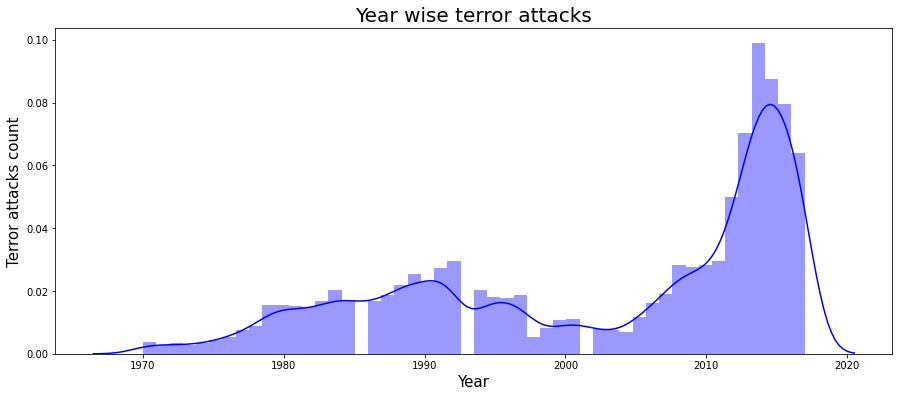

In [19]:
#no. of terror attacks year wise
plt.figure(figsize=(15,6))
fig = sns.distplot(terrorism_df["Year"].values, color = 'b')
fig.set_xlabel("Year",size=15)
fig.set_ylabel("Terror attacks count",size=15)
plt.title('Year wise terror attacks',size = 20)
plt.show()

**Inference:**

1.   The trend clearly shows the terrorist attacks increased drastically from 1998 to 2014. 2014 is a peak which have highest no of attacks

2.   After 2015 it started to decrease again, it is due to anti terrorism movement of various governments like nigeria, Iraq etc



# **EDA-3**
**Is most Casualites are also at same year as most terrorist attacks?**

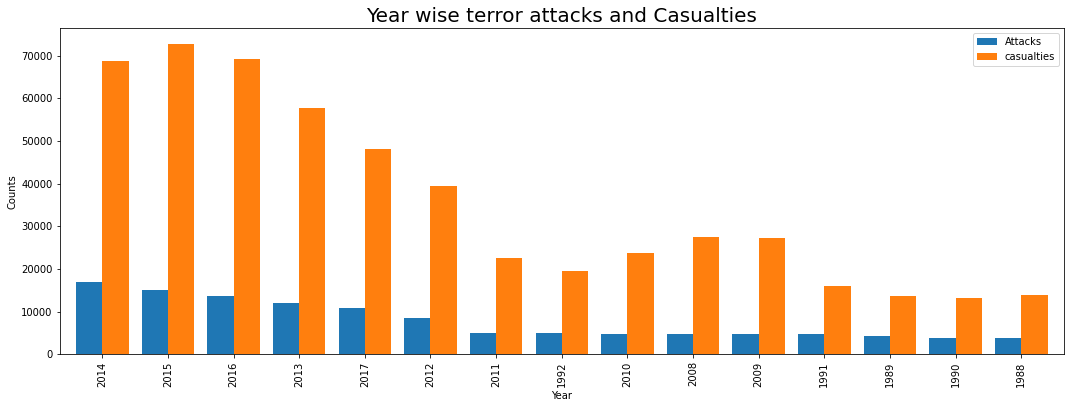

In [38]:
# COunting the year wise no of attacks 
count=terrorism_df['Year'].value_counts()[:15].to_frame()
count.columns=['Attacks']

# COunting the year wise no of casualitites
data=terrorism_df.groupby('Year')['casualties'].sum().to_frame()

#merging both to get single data frame 
count.merge(data,left_index=True,right_index=True,how='left').plot.bar(width=0.8)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.xlabel("Year")
plt.ylabel("Counts")
plt.title('Year wise terror attacks and Casualties',size = 20)
plt.show()

**Inference:**

*   It shows that **2014** is having highest no of attacks, but **2015** have highest number of casualties
*   We need to little deep dive into it



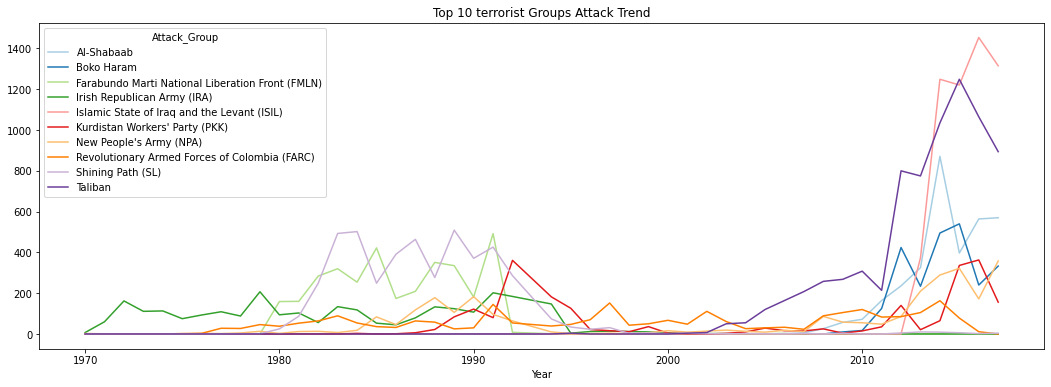

In [39]:
# creating dataframe for top 10 terrorist groups based on ATTACKS
top_groups10=terrorism_df[terrorism_df['Attack_Group'].isin(terrorism_df['Attack_Group'].value_counts()[1:11].index)]

#plotting the data in line chart it clealry shows year wise trend of organisation
pd.crosstab(top_groups10.Year,top_groups10.Attack_Group).plot(color=sns.color_palette('Paired',15))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title("Top 10 terrorist Groups Attack Trend")
plt.show()

Inference:

*  In 2014, **Boko Haram** , **ISIL  and Tailban terrorist organisation** is most active in that time. they are responsible sudden increase of attacks. So the attacks in 2014 is very high

*  It also shows us recent increase of Taliban aggression in Afghanistan, finally in 2021 they overthrow the Afghan government and fully takes over the country.





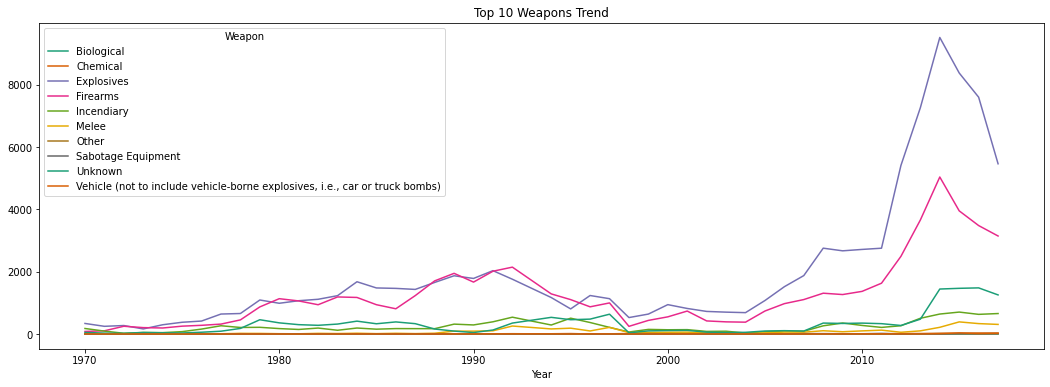

In [23]:
# Only we are selecting top 10 Weapons based on no of attacks
top_weapon10=terrorism_df[terrorism_df['Weapon'].isin(terrorism_df['Weapon'].value_counts()[0:10].index)]

# then we are taking Year and weapon and plotting it
pd.crosstab(top_weapon10.Year,top_weapon10.Weapon).plot(color=sns.color_palette('Dark2',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title("Top 10 Weapons Trend")
plt.show()

**Inference**:


*   It shows attack due to explosives,firearms and chemical weapons type are peak in 2014. so 2014 have more no of attacks

*   After that it started to decline due to strict regulation (Regulation 98/2013 of EU, Ref: https://doi.org/10.17226/24862, Control of Explosives Precursors Regulations 2014,UK) on buying of explosives and weapons, which makes the terrorist organizations are difficult to get it and vaiours anti terrorism in 2015 also responsible for decline in attacks






Text(0.5, 1.0, 'Top 10 Terrorist Groups Casualties Trend')

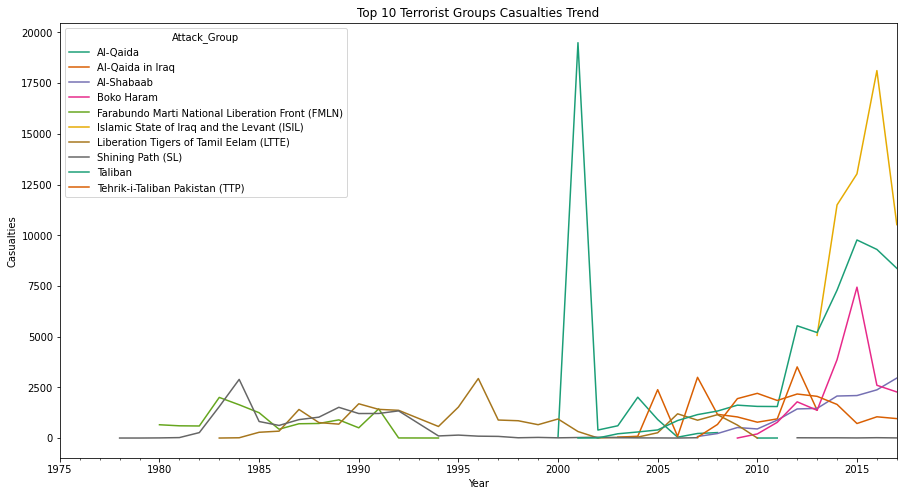

In [41]:
# creating dataframe for top 10 terrorist groups based on casualties
top_groups10=terrorism_df[terrorism_df['Attack_Group'].isin(terrorism_df.groupby(['Attack_Group'])['casualties'].sum().sort_values(ascending=False)[1:11].index)]

# grouping year and attack group based on casualties
d=top_groups10.groupby(['Year','Attack_Group'],sort=True)['casualties'].sum()
plot_df = d.unstack('Attack_Group').loc[:]
plot_df.index = pd.PeriodIndex(plot_df.index.tolist(),freq='A')

#plotting the data in line chart it clealry shows year wise trend of organisation
plot_df.plot(figsize=(15,8),color=sns.color_palette('Dark2',12))
plt.xlabel("Year")
plt.ylabel("Casualties")
plt.title("Top 10 Terrorist Groups Casualties Trend")

**Inference:**


*   It shows overall casualitites from attacks of various terror organisations is increased in 2015 compared to 2014, 


*  Even thought overall attacks are high in 2014, overall casualties seems more in 2015, due to effect of various attacks by various terrorist organisation 







Text(0.5, 1.0, 'Top 10 Terrorist Weapons Casualties Trend')

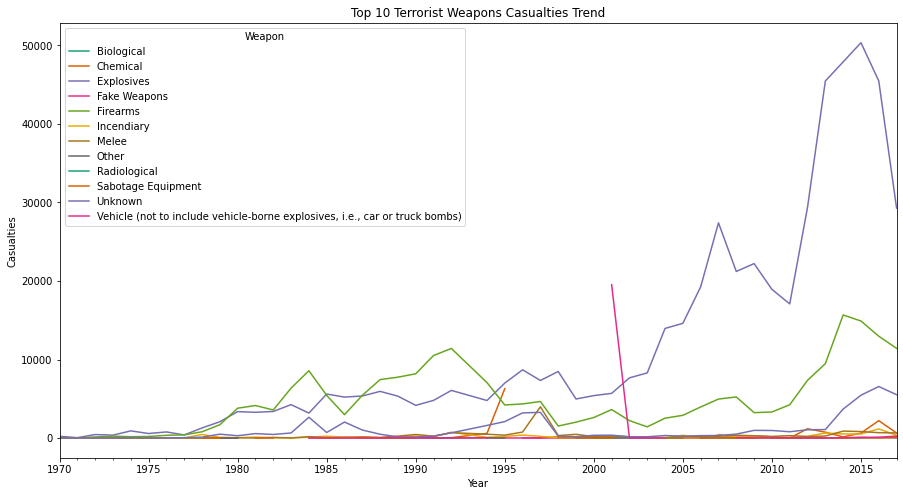

In [42]:
# creating dataframe based on weapon and year wise casualties
d=terrorism_df.groupby(['Year','Weapon'],sort=True)['casualties'].sum()
plot_df = d.unstack('Weapon').loc[:]
plot_df.index = pd.PeriodIndex(plot_df.index.tolist(),freq='A')

#then plot using .plot with different weapons category
plot_df.plot(figsize=(15,8),color=sns.color_palette('Dark2',12))
plt.xlabel("Year")
plt.ylabel("Casualties")
plt.title("Top 10 Terrorist Weapons Casualties Trend")

**Inference:**

*   Even though, 2014 have highest attacks, casualties are more in 2015 due to explosives, It increased our overall casualties in 2015


## **EDA-4**
Which Country is most attacked and having highest number of Casualties?

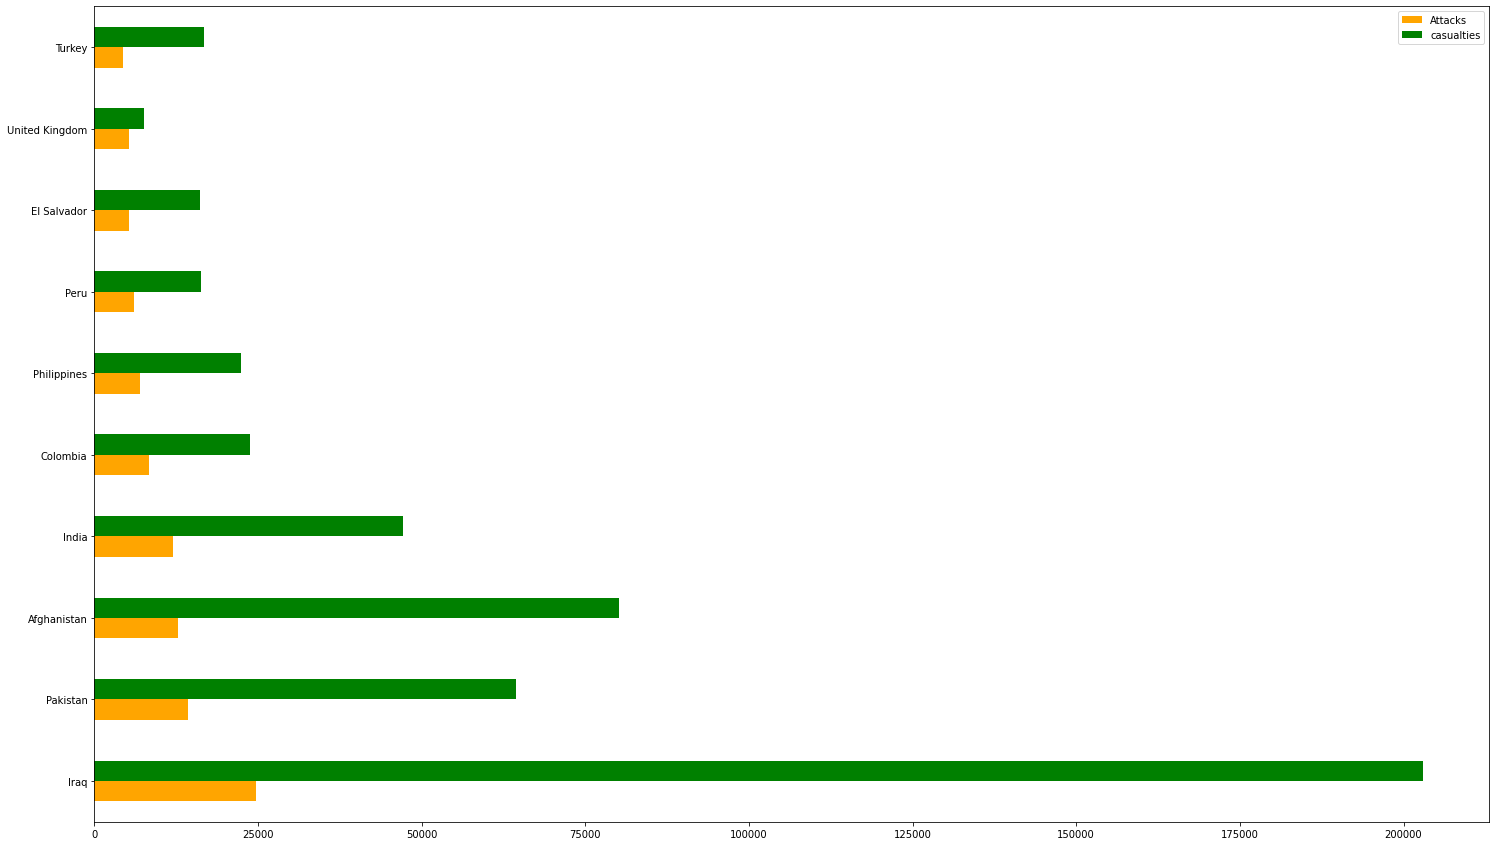

In [25]:
# selecting top 10 countries based on no of attacks 
count=terrorism_df['Country'].value_counts()[:10].to_frame()
count.columns=['Attacks']

#creating data frame for country based no of casulaties
data=terrorism_df.groupby('Country')['casualties'].sum().to_frame()

# then merging two dataset and form complete dataframe
count.merge(data,left_index=True,right_index=True,how='left').plot.barh(color={"Attacks": "orange", "casualties": "green"})
fig=plt.gcf()
fig.set_size_inches(25,15)
plt.show()

**Inference:**


*   It shows Iraq having higher no of attacks and casualties also very high, that makes perfect sense. Iraq is also one of middle east nation which is base for al-Qaeda important terrorist organization
*  Even though pakistan having Second highest number of attacks, but casualties are more in Afghanistan. we need to deep dive more why afghanisthan have more casualties



In [26]:
# create dataframe specially for Pakistan and Afghanisthan seperately
data=terrorism_df[(terrorism_df['Country']=='Pakistan')|(terrorism_df['Country']=='Afghanistan')]

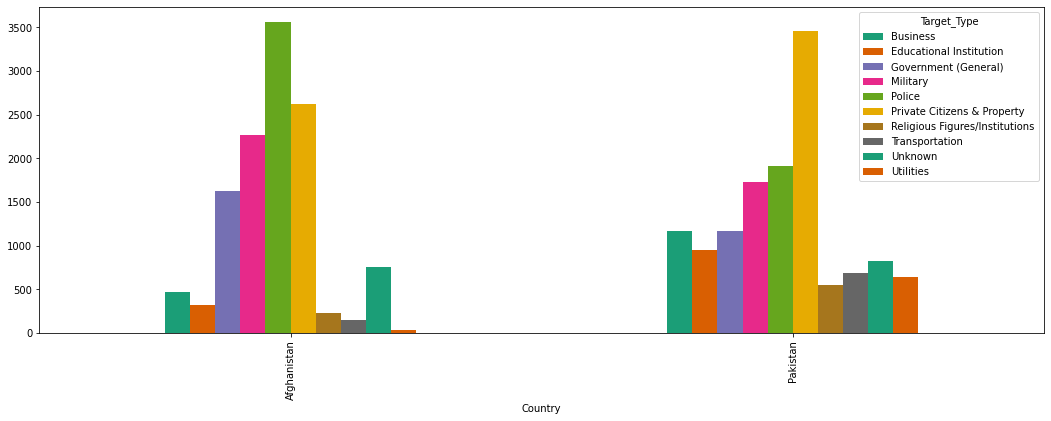

In [27]:
# Only we are selecting top 10 target types based on no of attacks
top_target10=data[data['Target_Type'].isin(data['Target_Type'].value_counts()[0:10].index)]

# then we are taking country and target and plotting it
pd.crosstab(top_target10.Country,top_target10.Target_Type).plot(color=sns.color_palette('Dark2',12),kind='bar')
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

**Inference:**


*   It clearly shows that overall Attacks are high in Pakistan, especially they are targeting private citizens & property 
*   Afghanistan have slightly less no of attacks compared to Pakistan, but we see more targeted attacks on military and police.



Text(0, 0.5, 'casualties')

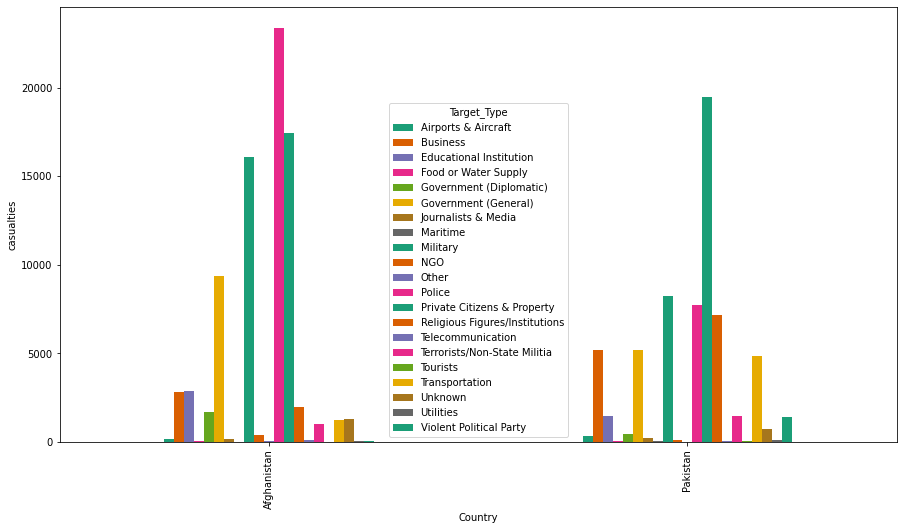

In [28]:
# creating dataframe based on weapon and year wise casualties
d=data.groupby(['Country','Target_Type'],sort=True)['casualties'].sum()
plot_df = d.unstack('Target_Type').loc[:]
plot_df.index = plot_df.index.tolist()

#then plot using .plot with different weapons category
plot_df.plot(figsize=(15,8),color=sns.color_palette('Dark2',12),kind='bar')
plt.xlabel("Country")
plt.ylabel("casualties")

**Inference:**


*   For Pakistan, It shows that casualties are more in highly targeted private citizen & property. and the casualties in private citizen & property little low in Afghanistan
* But in Afghanistan, the casualties on police is very high compared to Pakistan and military also having high number of casualties. So it clearly shows that  overall casualties are very high in Afghanistan


# **Top 10 cities attacked by terrorist**

In [29]:
#shows top 10 cities attacked by terrorist
terrorism_df['City'].value_counts().head(10)

Unknown         10209
Baghdad          7589
Karachi          2652
Lima             2359
Mosul            2265
Belfast          2171
Santiago         1621
Mogadishu        1581
San Salvador     1558
Istanbul         1048
Name: City, dtype: int64

Text(0.5, 1.0, 'Number Of Terrorist Activities in Top 10 Cities')

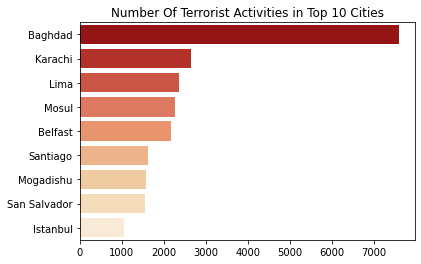

In [30]:
#ploting barplot based on no of terrorist activities top 10 cities 
sns.barplot(terrorism_df['City'].value_counts()[1:10].values,terrorism_df['City'].value_counts()[1:10].index,palette=('OrRd_r'))
plt.title('Number Of Terrorist Activities in Top 10 Cities')

Inference:

*   It shows that Baghdad is highest attacked city, it make sense is capital of highest attacked country Iraq
*   Karachi is second highest attacked city, it is largest city of second highest attacked country Pakistan



## **EDA-5**

Which Region is most attacked and having highest number of Casualties?

In [31]:
#creating region based attack counts
Region_attack=terrorism_df['Region'].value_counts().reset_index()
Region_attack

,index,Region
0,Middle East & North Africa,50474
1,South Asia,44974
2,South America,18978
3,Sub-Saharan Africa,17550
4,Western Europe,16639
5,Southeast Asia,12485
6,Central America & Caribbean,10344
7,Eastern Europe,5144
8,North America,3456
9,East Asia,802


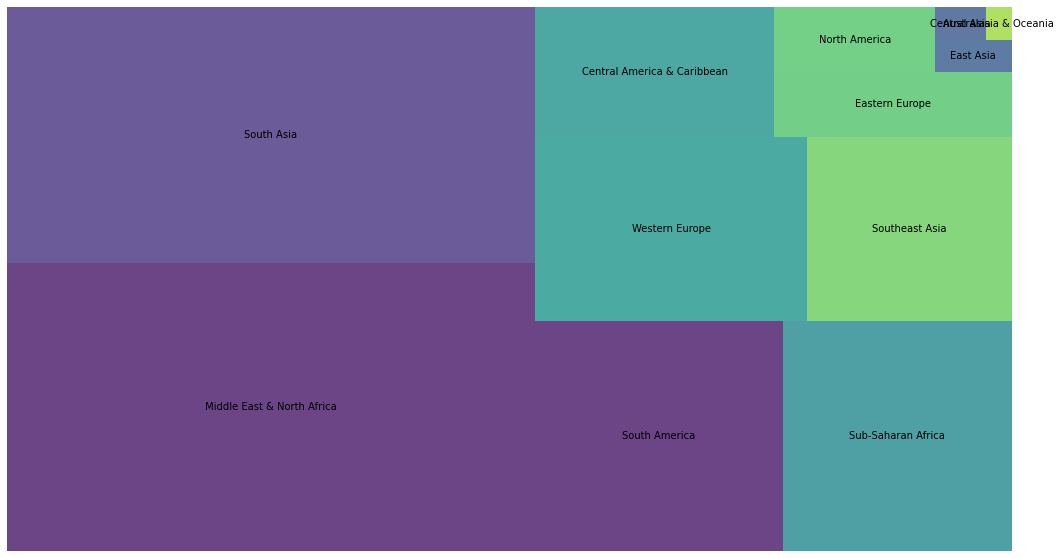

In [32]:
# showing tree map based on region wise attacks using squarify 
fig = plt.gcf()
fig.set_size_inches(18, 10)
squarify.plot(sizes=Region_attack['Region'],label=Region_attack['index'], alpha=.8)
plt.axis('off')
plt.show()

In [33]:
# creating data frame region based casualties
Region=terrorism_df.groupby(['Region']).agg({'casualties':'sum'}).reset_index()
Region.sort_values('casualties',ascending=False,inplace=True)

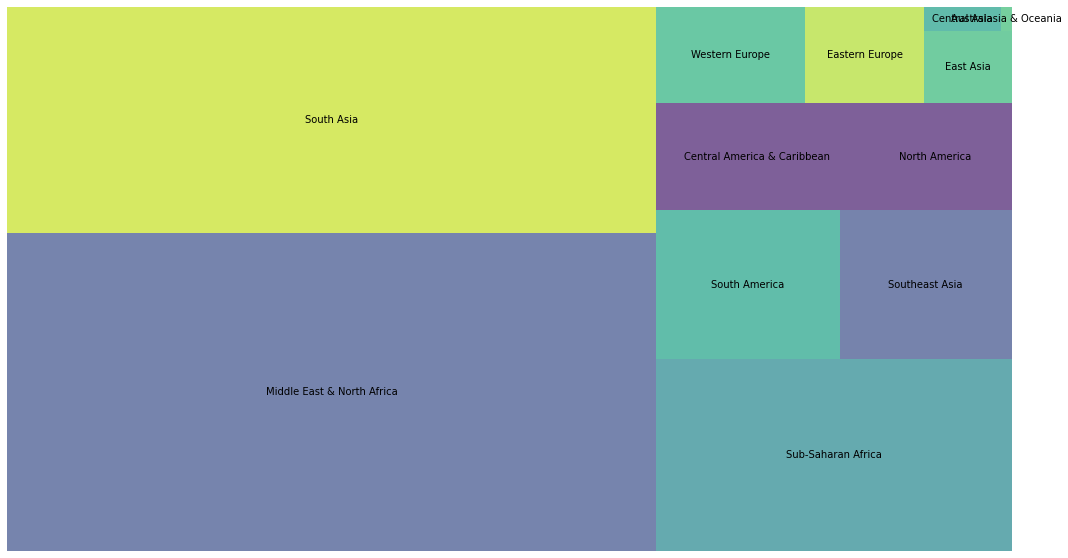

In [34]:
# showing tree map based on region wise casualties using squarify 
fig = plt.gcf()
fig.set_size_inches(18, 10)
squarify.plot(sizes=Region['casualties'],label=Region['Region'], alpha=.7)
plt.axis('off')
plt.show()



**Inference**
*   Middle East and North Africa have suffered the highest casualties followed by South Asia and Sub-Saharan Africa.
*   The Sub-Saharan African region has suffered more fatalities than Western Europe even though the number of attacks have been greater in Western Europe. Sub-Saharan Africa is still under developed, the military dont have much equipments and weapons to control terrorist.




## **EDA-6**
what is the trend in suicide attacks?

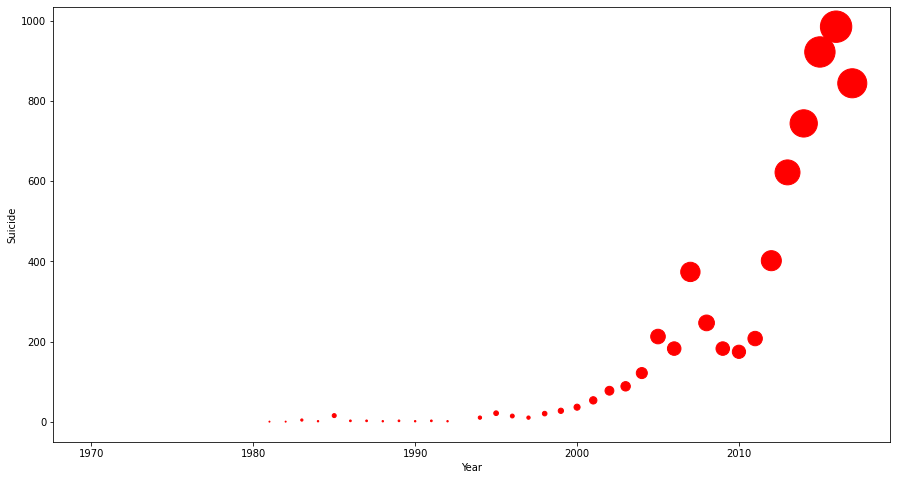

In [35]:
#creating dataframe based on yearwise suicide attacks
suicides_by_year = terrorism_df[["Year","Suicide"]].groupby("Year").sum().reset_index()
suicides_by_year.plot.scatter(color = 'r',x='Year',y='Suicide',s='Suicide',figsize=[15,8]);

**Inference:**

*  It clearly shows that there is increase in trend of suicide attacks among terrorist organizations in recent years
*  Suicides attacks are increased drastically after 2000,terrorist organization thought it is most efficient way to attacks
*   They used lot of sleeper cells or brainwash peoples who have some bitterness against government, they target them and use them for suicide attacks




